In [26]:
#libraries import

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt, pylab as pylab
from sklearn import *
import re

In [13]:
data_rick_diamonds = pd.read_csv('rick_diamonds.csv')
data_rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18


In [14]:
data_diamonds = pd.read_csv('diamonds.csv')
data_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [15]:
from sklearn.linear_model import LinearRegression

X=data_diamonds[['carat']]
y=data_diamonds['price']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [16]:
data_rick_diamonds['price_predicted'] = model.predict(data_rick_diamonds[['carat']])

In [23]:
data_rick_diamonds.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,4804.879333
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,692.422362
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1778.731751
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6279.156361
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,15435.192637


In [24]:
data_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48940 entries, 0 to 48939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    48940 non-null  float64
 1   cut      48940 non-null  object 
 2   color    48940 non-null  object 
 3   clarity  48940 non-null  object 
 4   depth    48940 non-null  float64
 5   table    48940 non-null  float64
 6   price    48940 non-null  int64  
 7   x        48940 non-null  float64
 8   y        48940 non-null  float64
 9   z        48940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 3.7+ MB


In [25]:
data_rick_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   carat            5000 non-null   float64
 1   cut              5000 non-null   object 
 2   color            5000 non-null   object 
 3   clarity          5000 non-null   object 
 4   depth            5000 non-null   float64
 5   table            5000 non-null   float64
 6   x                5000 non-null   float64
 7   y                5000 non-null   float64
 8   z                5000 non-null   float64
 9   price_predicted  5000 non-null   float64
dtypes: float64(7), object(3)
memory usage: 390.8+ KB


How to determine the price of a diamond:

Carat weight of the diamond

Cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm

y width in mm

z depth in m

depth: The height of a diamond

table: The width of the diamond’s table expressed as a percentage of its average diameter

In [27]:
data_diamonds['cut_num'] = np.where(data_diamonds['cut']== 'Fair', 1,
                           np.where(data_diamonds['cut']== 'Good', 2, 
                           np.where(data_diamonds['cut']== 'Very Good',3,
                           np.where(data_diamonds['cut']== 'Premium',4,5))))

In [51]:
data_rick_diamonds['cut_num'] = np.where(data_rick_diamonds['cut']== 'Fair', 1,
                           np.where(data_rick_diamonds['cut']== 'Good', 2, 
                           np.where(data_rick_diamonds['cut']== 'Very Good',3,
                           np.where(data_rick_diamonds['cut']== 'Premium',4,5))))

In [37]:
data_diamonds['color_num'] = np.where(data_diamonds['color']== 'J', 1,
                             np.where(data_diamonds['color']== 'I', 2, 
                             np.where(data_diamonds['color']== 'H', 3,
                             np.where(data_diamonds['color']== 'G', 4,
                             np.where(data_diamonds['color']== 'F', 5, 6)))))

In [52]:
data_rick_diamonds['color_num'] = np.where(data_rick_diamonds['color']== 'J', 1,
                             np.where(data_rick_diamonds['color']== 'I', 2, 
                             np.where(data_rick_diamonds['color']== 'H', 3,
                             np.where(data_rick_diamonds['color']== 'G', 4,
                             np.where(data_rick_diamonds['color']== 'F', 5, 6)))))

In [40]:
data_diamonds['clarity_num'] = np.where(data_diamonds['clarity']== 'I1', 1,
                               np.where(data_diamonds['clarity']== 'SI2', 2, 
                               np.where(data_diamonds['clarity']== 'SI1', 3,
                               np.where(data_diamonds['clarity']== 'VS2', 4,
                               np.where(data_diamonds['clarity']== 'VS1', 5,
                               np.where(data_diamonds['clarity']== 'VVS2', 6,
                               np.where(data_diamonds['clarity']== 'VVS1', 7,8)))))))

In [53]:
data_rick_diamonds['clarity_num'] = np.where(data_rick_diamonds['clarity']== 'I1', 1,
                               np.where(data_rick_diamonds['clarity']== 'SI2', 2, 
                               np.where(data_rick_diamonds['clarity']== 'SI1', 3,
                               np.where(data_rick_diamonds['clarity']== 'VS2', 4,
                               np.where(data_rick_diamonds['clarity']== 'VS1', 5,
                               np.where(data_rick_diamonds['clarity']== 'VVS2', 6,
                               np.where(data_rick_diamonds['clarity']== 'VVS1', 7,8)))))))

In [42]:
#depth = z/mean(x,y) = 2*z/(x+y)
x=3.89
y = 3.84
z=2.31

2*z/(x+y)

0.5976714100905562

In [87]:
data_diamonds[data_diamonds['x']==0

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0,5,5,2
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0,3,3,4
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0,1,4,5
22240,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0,5,4,4
23795,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0,4,6,7
24864,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0,4,3,2
44936,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,2,5,2


In [98]:
data_diamonds.corr()

,carat,depth,table,price,x,y,z,cut_num,color_num,clarity_num
carat,1.000000,0.027074,0.181688,0.922186,0.975152,0.949687,0.951824,-0.136218,-0.299625,-0.353837
depth,0.027074,1.000000,-0.297123,-0.012037,-0.025858,-0.029903,0.094344,-0.220066,-0.048851,-0.067543
table,0.181688,-0.297123,1.000000,0.127832,0.195367,0.183362,0.150646,-0.431738,-0.028058,-0.160579
price,0.922186,-0.012037,0.127832,1.000000,0.885019,0.864059,0.860247,-0.055150,-0.176244,-0.148668
x,0.975152,-0.025858,0.195367,0.885019,1.000000,0.972447,0.969336,-0.127095,-0.277152,-0.372725
y,0.949687,-0.029903,0.183362,0.864059,0.972447,1.000000,0.948768,-0.122565,-0.269623,-0.358191
z,0.951824,0.094344,0.150646,0.860247,0.969336,0.948768,1.000000,-0.150714,-0.274580,-0.367025
cut_num,-0.136218,-0.220066,-0.431738,-0.055150,-0.127095,-0.122565,-0.150714,1.000000,0.020580,0.189438
color_num,-0.299625,-0.048851,-0.028058,-0.176244,-0.277152,-0.269623,-0.274580,0.020580,1.000000,-0.009351
clarity_num,-0.353837,-0.067543,-0.160579,-0.148668,-0.372725,-0.358191,-0.367025,0.189438,-0.009351,1.000000


In [232]:
from sklearn.linear_model import LinearRegression

X=data_diamonds[['carat','cut_num','color_num','clarity_num']]
y=data_diamonds['y']

model = LinearRegression()
model.fit(X,y)
data_diamonds['teste_y'] = model.predict(X)

In [233]:
from sklearn.metrics import mean_squared_error
(np.sqrt(mean_squared_error(data_diamonds['x'],data_diamonds['teste_x'])),
np.sqrt(mean_squared_error(data_diamonds['y'],data_diamonds['teste_y'])),
np.sqrt(mean_squared_error(data_diamonds['z'],data_diamonds['teste_z'])))

(0.24566720853855567, 0.35718829586617223, 0.21515873646028597)

In [234]:
from sklearn.metrics import r2_score
(r2_score(data_diamonds['x'],data_diamonds['teste_x']),
r2_score(data_diamonds['y'],data_diamonds['teste_y']),
r2_score(data_diamonds['z'],data_diamonds['teste_z']))

(0.9520510379955596, 0.9027405859706997, 0.907335498500031)

In [236]:
data_diamonds['new_depth'] = 2*data_diamonds['teste_z']/(data_diamonds['teste_x']+data_diamonds['teste_y'])

In [237]:
data_diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_num,color_num,clarity_num,teste_x,teste_y,teste_z,new_depth
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,4,6,3,4.422423,4.427584,2.733046,0.617637
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,2,6,5,4.403645,4.415817,2.755929,0.624965
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,4,2,4,4.546999,4.552665,2.818392,0.619450
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,2,1,2,4.605310,4.601313,2.890908,0.628006
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48,3,1,6,4.369078,4.381975,2.729022,0.623701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48935,0.72,Premium,D,SI1,62.7,59.0,2757,5.69,5.73,3.58,4,6,3,5.592073,5.593351,3.448344,0.616578
48936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,5,6,3,5.602793,5.604478,3.437670,0.613471
48937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,2,6,3,5.570633,5.571096,3.469693,0.622828
48938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,3,6,3,5.535484,5.536507,3.430968,0.619756


In [240]:
from sklearn.linear_model import LinearRegression

X=data_rick_diamonds[['carat','cut_num','color_num','clarity_num']]
y=data_rick_diamonds['y']

model = LinearRegression()
model.fit(X,y)
data_rick_diamonds['teste_y'] = model.predict(X)

In [241]:
from sklearn.metrics import mean_squared_error
(np.sqrt(mean_squared_error(data_rick_diamonds['x'],data_rick_diamonds['teste_x'])),
np.sqrt(mean_squared_error(data_rick_diamonds['y'],data_rick_diamonds['teste_y'])),
np.sqrt(mean_squared_error(data_rick_diamonds['z'],data_rick_diamonds['teste_z'])))

(0.24790188390489504, 0.2550856852857198, 0.16933985487031347)

In [242]:
from sklearn.metrics import r2_score
(r2_score(data_rick_diamonds['x'],data_rick_diamonds['teste_x']),
r2_score(data_rick_diamonds['y'],data_rick_diamonds['teste_y']),
r2_score(data_rick_diamonds['z'],data_rick_diamonds['teste_z']))

(0.9510246276247014, 0.9472110370201694, 0.9405749263906935)

In [243]:
data_rick_diamonds['new_depth'] = 2*data_rick_diamonds['teste_z']/(data_rick_diamonds['teste_x']+data_rick_diamonds['teste_y'])

In [244]:
data_rick_diamonds

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted,cut_num,color_num,clarity_num,teste_x,teste_y,teste_z,new_depth
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2516.308226,3,3,2,6.017262,6.009552,3.730001,0.620281
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,-8516.140491,2,5,4,4.753170,4.764884,2.965516,0.623135
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,-5153.967895,5,3,4,5.105249,5.109833,3.137657,0.614318
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,8566.421708,5,4,5,6.415009,6.411426,3.938822,0.614172
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,27266.420592,5,4,2,9.188827,9.152112,5.641560,0.615188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.30,Very Good,D,SI2,62.2,59.0,4.25,4.30,2.66,-11230.332024,3,6,2,4.638797,4.646488,2.877493,0.619796
4996,0.51,Ideal,F,VVS2,61.9,56.0,5.09,5.14,3.16,-3671.313663,5,5,6,5.046178,5.058634,3.096438,0.612864
4997,1.01,Very Good,F,SI1,60.6,60.0,6.37,6.43,3.88,5827.452070,3,5,3,6.234135,6.229115,3.858351,0.619156
4998,0.31,Ideal,F,VVS1,62.1,56.0,4.35,4.38,2.71,-8512.015310,5,5,7,4.564188,4.583689,2.800442,0.612261


<AxesSubplot:xlabel='clarity_num', ylabel='carat'>

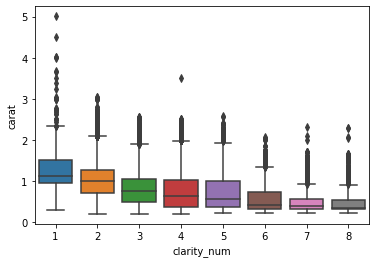

In [104]:
sns.boxplot(x='clarity_num',y='carat',data=data_diamonds)

In [245]:
from sklearn.linear_model import LinearRegression

X=data_diamonds[['carat','new_depth','cut_num','color_num','clarity_num']]
y=data_diamonds['price']

model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [246]:
data_rick_diamonds['price_predicted'] = model.predict(data_rick_diamonds[['carat','new_depth','cut_num','color_num','clarity_num']])

In [247]:
data_rick_diamonds.to_csv('diamond_model2.csv', index=False)
#Your root mean squared error is 1291.9973166099717